# Classsification models
   ![censusincome'](image.png)

## Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Ingestion
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model
* Hypertuning the model

## 1. Problem statement.
* This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).   
* The prediction task is to determine whether a person makes over 50K a year.

## 2. Data Collection
* The Dataset is collected from Website named, UCI Machine Learning Repository.
* Link for dataset - https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
* Source:  
   Donor:Ronny Kohavi and Barry Becker  
   Data Mining and Visualization  
   Silicon Graphics.  
   e-mail: ronnyk'@'sgi.com  


## 3. Data Ingestion

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pickle
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import scikitplot as skl
sns.set()

In [2]:
df1 = pd.read_csv(r'C:\Users\bolt0\Data science\census_income_dataset\data\adult.data',names = ['Age','Workclass','Final_weight','Education','Education_level','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_per_week','Native_country','Income_class'])

In [3]:
df1.head()

,Age,Workclass,Final_weight,Education,Education_level,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df2 = pd.read_csv(r'C:\Users\bolt0\Data science\census_income_dataset\data\adult.test',names = ['Age','Workclass','Final_weight','Education','Education_level','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_per_week','Native_country','Income_class'])

In [5]:
df2.head()

,Age,Workclass,Final_weight,Education,Education_level,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_class
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


#### Removing the First row from df2 dataframe . 

In [6]:
df2.drop(index = 0 ,inplace = True)
df2.reset_index(inplace =True ,drop = True)

In [7]:
df2.head()

,Age,Workclass,Final_weight,Education,Education_level,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_class
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


#### Combining Both dataframes df1 and df2 into single dataframe

In [8]:
df = pd.concat([df1, df2],axis=0)

In [9]:
df

,Age,Workclass,Final_weight,Education,Education_level,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_class
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16277,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16278,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16279,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


## 4. Data Cleaning

There are some values in the datset where data is missing and instead of NaN it has "?" value which we need to change to null.

In [10]:
df.replace(' ?',np.nan,inplace= True)

In [11]:
df

,Age,Workclass,Final_weight,Education,Education_level,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_class
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16277,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16278,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16279,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


### Null values

In [12]:
df.isnull().sum()

Age                   0
Workclass          2799
Final_weight          0
Education             0
Education_level       0
Marital_status        0
Occupation         2809
Relationship          0
Race                  0
Sex                   0
Capital_gain          0
Capital_loss          0
Hours_per_week        0
Native_country      857
Income_class          0
dtype: int64

In [13]:
df.dropna(inplace = True)

In [14]:
df.reset_index(inplace =True ,drop = True)

In [15]:
df

,Age,Workclass,Final_weight,Education,Education_level,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_class
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
45218,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
45219,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
45220,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [16]:
df.isnull().sum()

Age                0
Workclass          0
Final_weight       0
Education          0
Education_level    0
Marital_status     0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital_gain       0
Capital_loss       0
Hours_per_week     0
Native_country     0
Income_class       0
dtype: int64

### Duplicated values

In [17]:
df.duplicated().sum()

28

In [18]:
df.drop_duplicates(inplace= True)

In [19]:
df.reset_index(inplace =True ,drop = True)

In [20]:
df

,Age,Workclass,Final_weight,Education,Education_level,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_class
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45189,33,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
45190,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
45191,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
45192,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


## Encoding target variable

The target variable is Incoem_class which has 2 categories <= 50K and >50K denoting Salaries of the Individuals , we are going to encode <=50K as __0__ and >50K as __1__

In [21]:
df['Income_class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [22]:
df['Income_class'] = df['Income_class'].map({" <=50K": 0," <=50K.":0," >50K.":1," >50K":1})

In [23]:
df

,Age,Workclass,Final_weight,Education,Education_level,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_class
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45189,33,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,0
45190,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,0
45191,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,0
45192,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,0


In [24]:
df['Income_class'].unique()

array([0, 1], dtype=int64)

In [25]:
df.dtypes

Age                 object
Workclass           object
Final_weight       float64
Education           object
Education_level    float64
Marital_status      object
Occupation          object
Relationship        object
Race                object
Sex                 object
Capital_gain       float64
Capital_loss       float64
Hours_per_week     float64
Native_country      object
Income_class         int64
dtype: object

##### Converting Age Feature to integer data type

In [26]:
df['Age'] = df['Age'].astype(int)

In [27]:
df.dtypes

Age                  int32
Workclass           object
Final_weight       float64
Education           object
Education_level    float64
Marital_status      object
Occupation          object
Relationship        object
Race                object
Sex                 object
Capital_gain       float64
Capital_loss       float64
Hours_per_week     float64
Native_country      object
Income_class         int64
dtype: object

 # 5. EDA

In [28]:
df.sample(6)

,Age,Workclass,Final_weight,Education,Education_level,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_class
4895,28,Private,212091.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,2580.0,0.0,40.0,United-States,0
45118,68,Self-emp-not-inc,273088.0,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,10.0,United-States,0
31206,56,Self-emp-inc,124137.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,45.0,United-States,1
36345,35,Private,211154.0,HS-grad,9.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,45.0,United-States,0
8798,33,Private,143582.0,HS-grad,9.0,Separated,Other-service,Unmarried,Asian-Pac-Islander,Female,0.0,0.0,48.0,China,0
18220,23,Local-gov,280164.0,HS-grad,9.0,Never-married,Other-service,Own-child,Black,Male,0.0,0.0,32.0,United-States,0


### Attributes Information : 

* __Age__: continuous.Age of the individual
* __Workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* __Final_weight__: continuous. 
* __Education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* __Education_level__: continuous.
* __Marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* __Occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* __Relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* __Race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* __Sex__: Female, Male.
* __Capital_gain__: continuous.
* __Capital_loss__: continuous.
* __Hours_per_week__: continuous.
* __Native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* __Income_class__:<=50K as 0 and >50K as 1       

#### Shape and info

In [29]:
df.shape

(45194, 15)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45194 entries, 0 to 45193
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              45194 non-null  int32  
 1   Workclass        45194 non-null  object 
 2   Final_weight     45194 non-null  float64
 3   Education        45194 non-null  object 
 4   Education_level  45194 non-null  float64
 5   Marital_status   45194 non-null  object 
 6   Occupation       45194 non-null  object 
 7   Relationship     45194 non-null  object 
 8   Race             45194 non-null  object 
 9   Sex              45194 non-null  object 
 10  Capital_gain     45194 non-null  float64
 11  Capital_loss     45194 non-null  float64
 12  Hours_per_week   45194 non-null  float64
 13  Native_country   45194 non-null  object 
 14  Income_class     45194 non-null  int64  
dtypes: float64(5), int32(1), int64(1), object(8)
memory usage: 5.0+ MB


#### Seperating Numerical and Categorical Features

In [31]:
num_feat = [fea for fea in df.columns if df[fea].dtype != object]
cat_feat = [fea for fea in df.columns if df[fea].dtype == object]
print(" We have {} Numerical features : {}".format(len(num_feat), num_feat))
print(" We have {} Categorical features : {}".format(len(cat_feat), cat_feat))

 We have 7 Numerical features : ['Age', 'Final_weight', 'Education_level', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income_class']
 We have 8 Categorical features : ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']


### Statistical description

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,45194.0,38.551755,13.215806,17.0,28.00,37.0,47.0,90.0
Final_weight,45194.0,189737.853056,105640.654414,13492.0,117392.25,178312.0,237903.0,1490400.0
Education_level,45194.0,10.119109,2.552057,1.0,9.00,10.0,13.0,16.0
Capital_gain,45194.0,1102.112736,7508.705003,0.0,0.00,0.0,0.0,99999.0
Capital_loss,45194.0,88.650308,405.075515,0.0,0.00,0.0,0.0,4356.0
Hours_per_week,45194.0,40.941209,12.006449,1.0,40.00,40.0,45.0,99.0
Income_class,45194.0,0.247953,0.431829,0.0,0.00,0.0,0.0,1.0


## Univariate Analysis

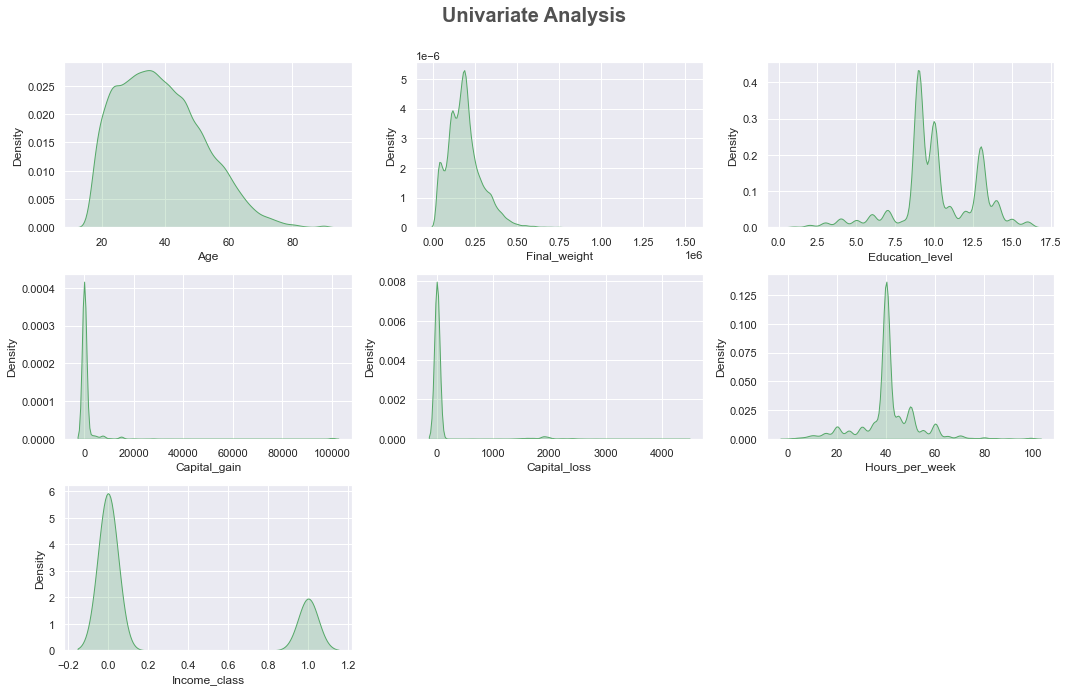

In [33]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_feat)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_feat[i]],shade=True, color='g')
    plt.xlabel(num_feat[i])
    plt.tight_layout()

__observations__
* Age is aprroximately normally distributed.
* Final weight,capital loss & capital gain are heavily right skewed.


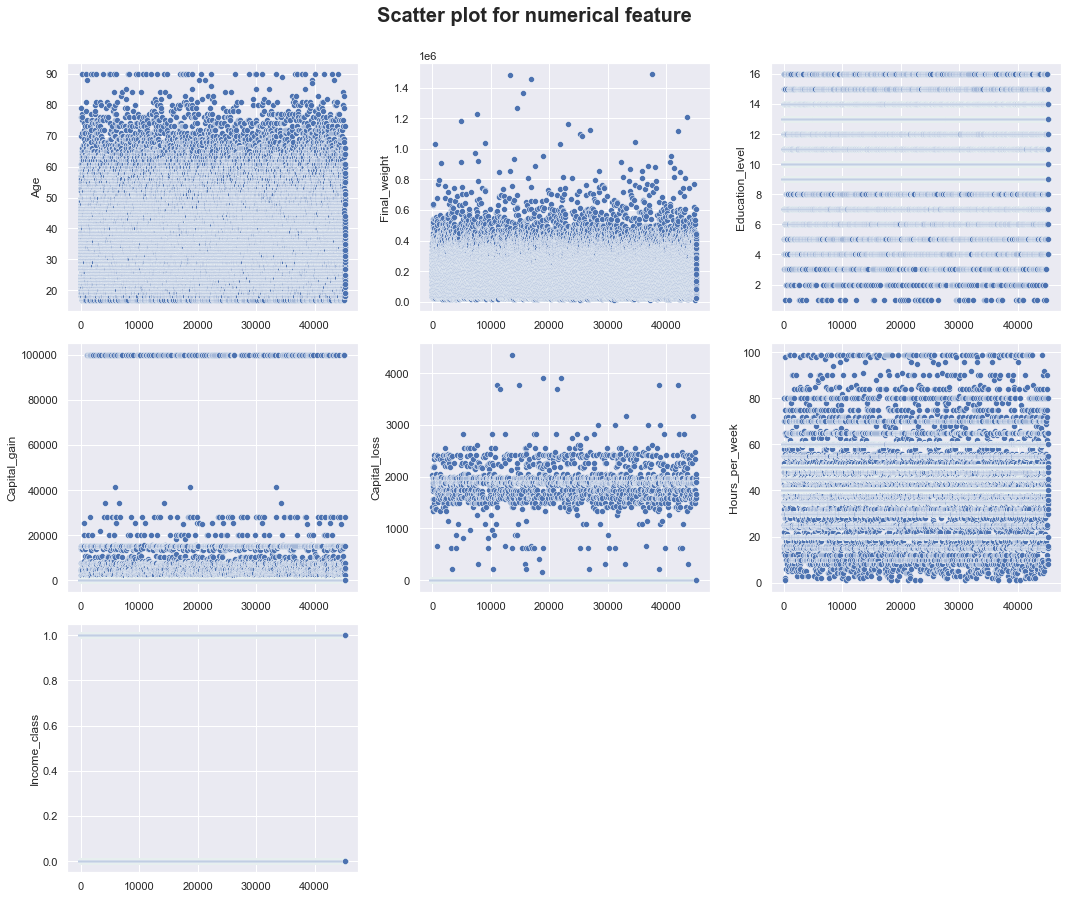

In [34]:
plt.figure(figsize=(15, 20))
plt.suptitle('Scatter plot for numerical feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(num_feat)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=num_feat[i], x=df.index, data=df , color = 'b')
    plt.tight_layout()

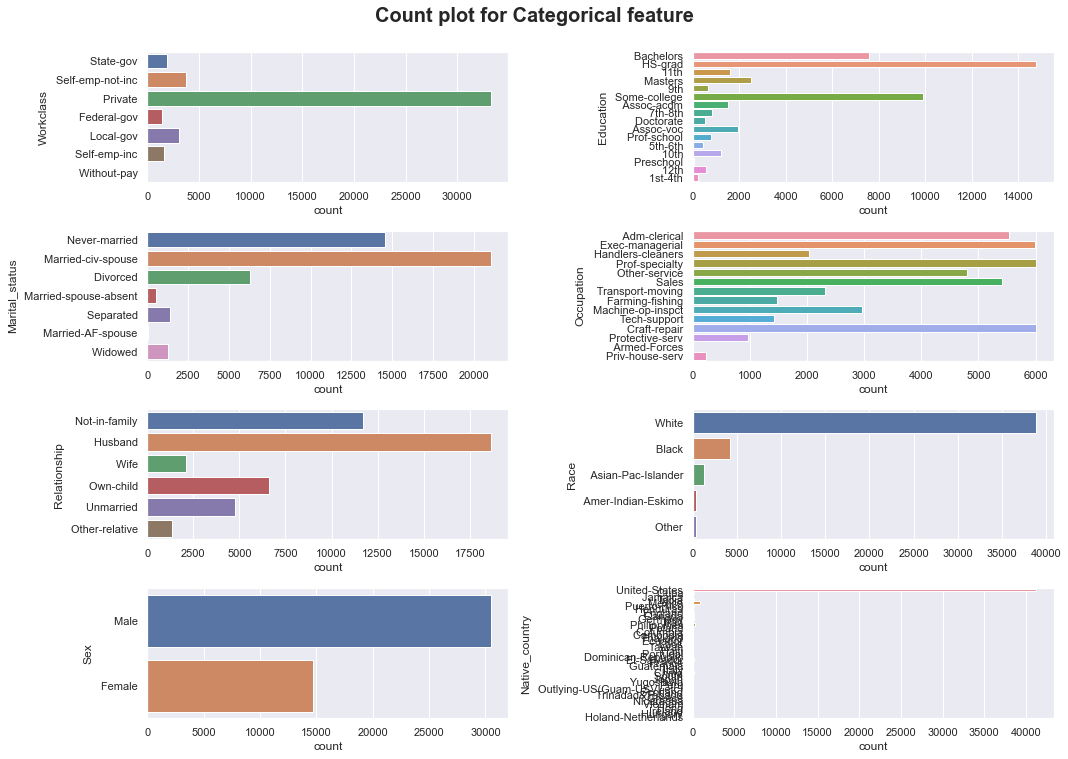

In [35]:
plt.figure(figsize=(15, 20))
plt.suptitle('Count plot for Categorical feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(cat_feat)):
    plt.subplot(8, 2, i+1)
    sns.countplot(y=cat_feat[i], data=df)
    plt.tight_layout()

## Bivariate Analysis

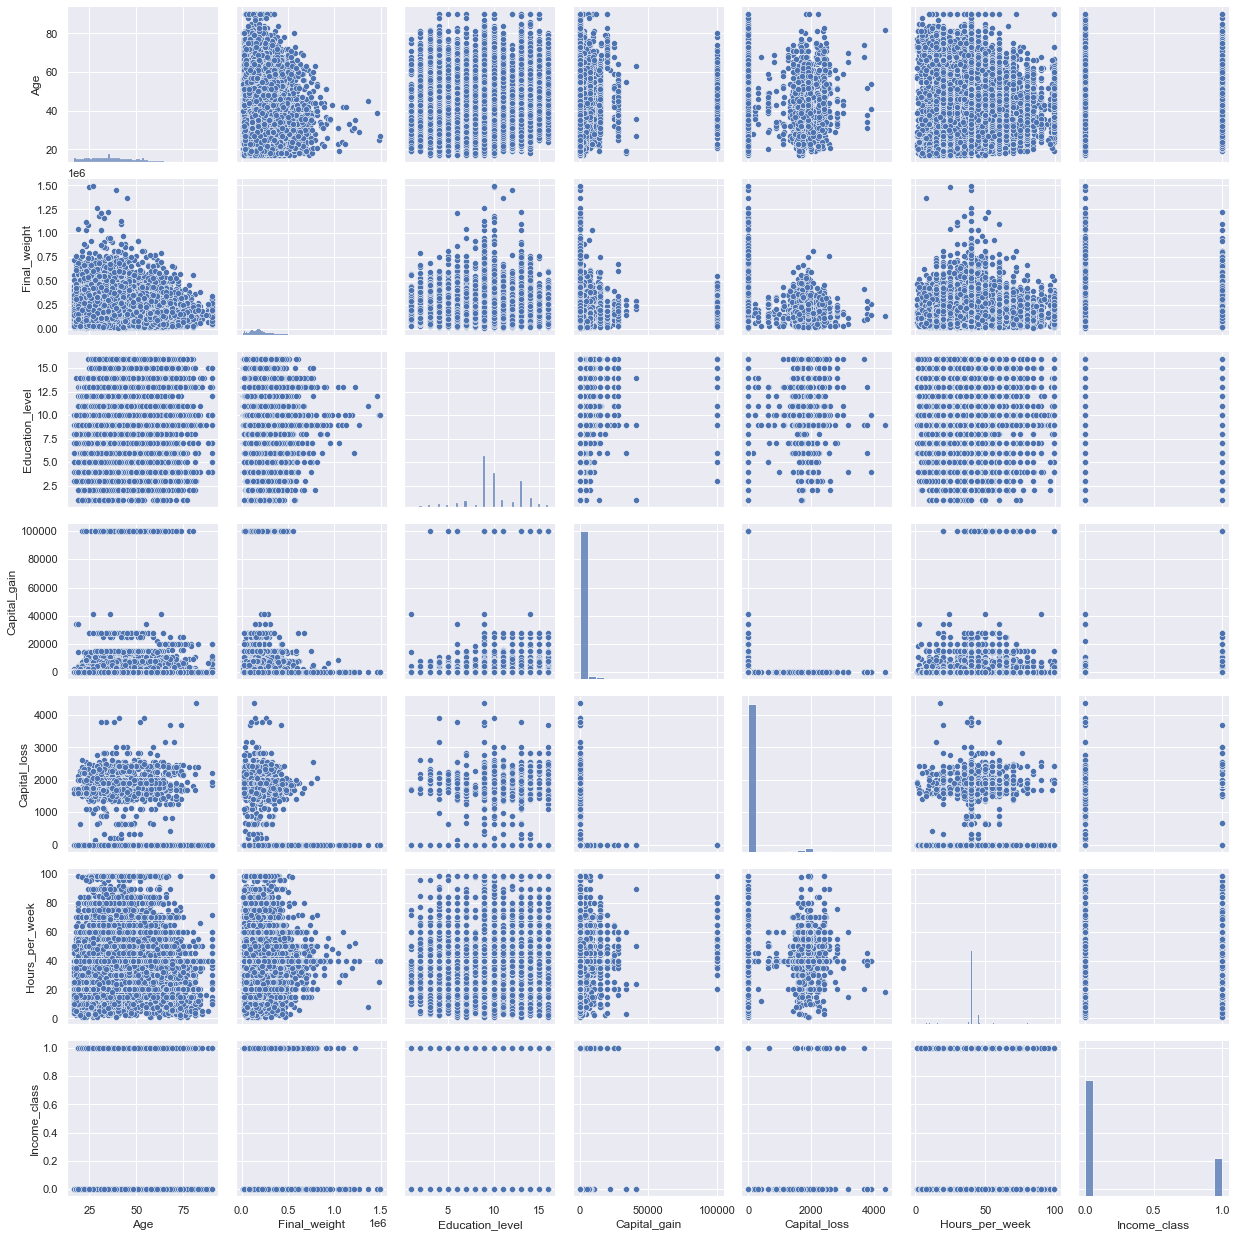

In [36]:
sns.pairplot(df)

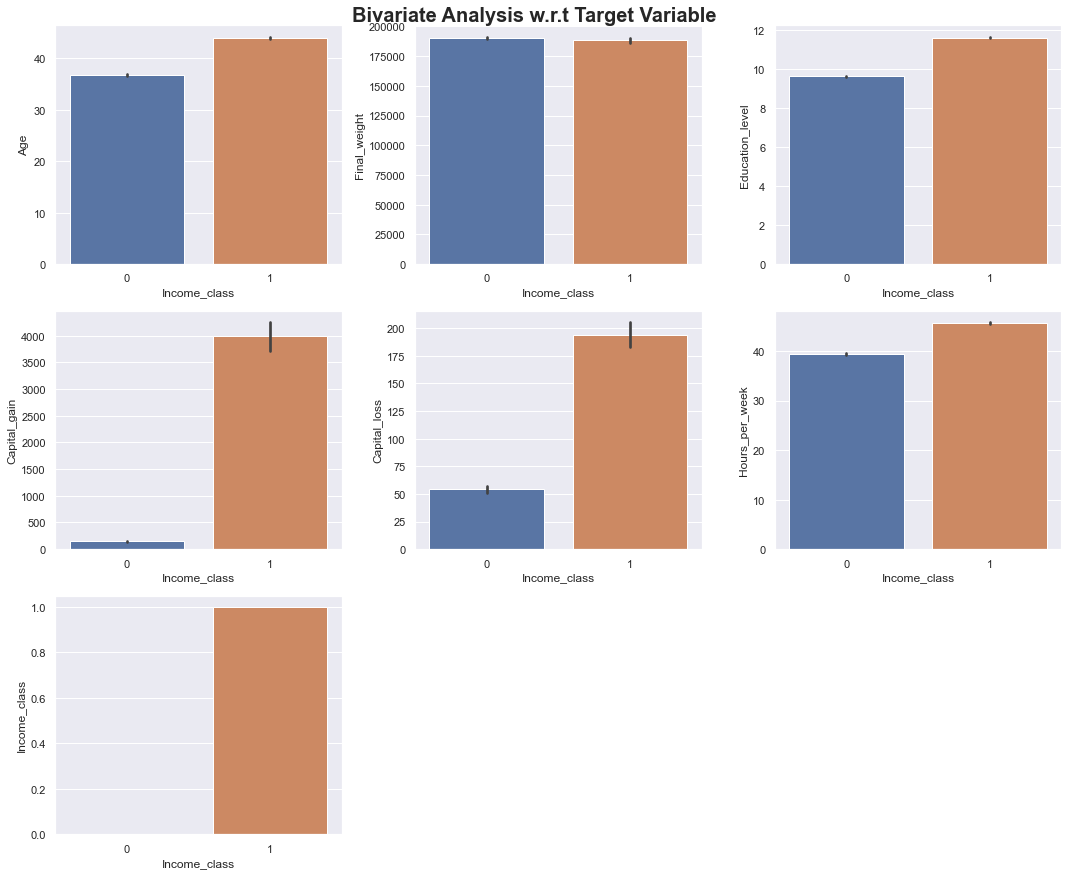

In [37]:
plt.figure(figsize=(15,20))
plt.suptitle('Bivariate Analysis w.r.t Target Variable', fontsize=20, fontweight='bold')
for i in range(0, len(num_feat)):
             plt.subplot(5, 3, i+1) 
             sns.barplot(y=num_feat[i], x='Income_class', data = df)
             plt.tight_layout()


#### Correlation

<AxesSubplot:>

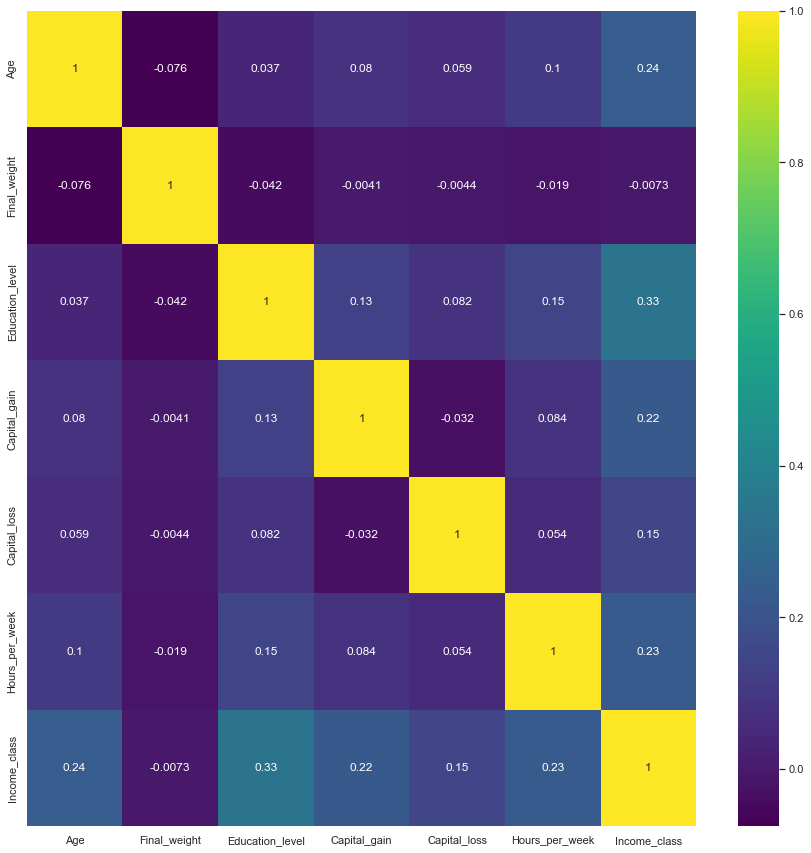

In [38]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cmap = 'viridis')

__observation:__  
* There is very lowcorrelation between the features , which shows that there is less to no multicollinearity in the dataset.
* Final_weight has lowest correlation with rest of the Features.
* The highest Correlation is between Education_level and Income_Class equal to 0.33

Text(0.5, 0.98, "Relation between Individual's Sex and Hours_per_week")

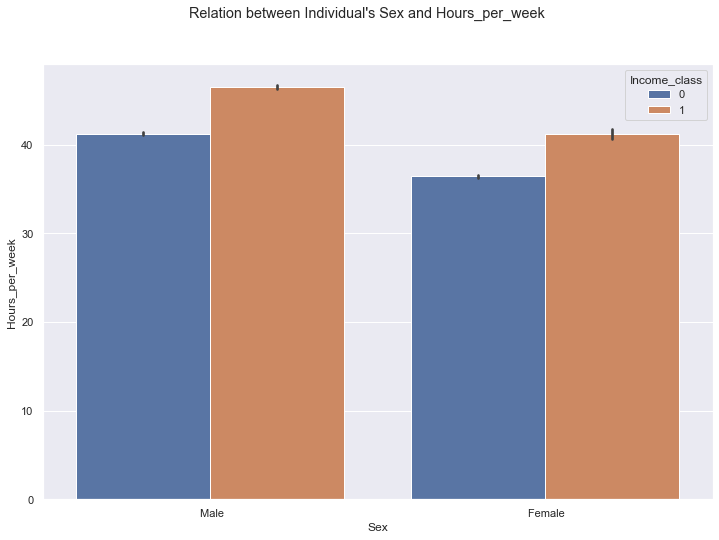

In [39]:
plt.figure(figsize=(12,8))
sns.barplot(x='Sex', y='Hours_per_week', data=df,hue='Income_class')
plt.suptitle("Relation between Individual's Sex and Hours_per_week")

__Observation:__  
* Males work for more hours per week than Females

__Income based on Occupation__


<AxesSubplot:xlabel='Income_class', ylabel='count'>

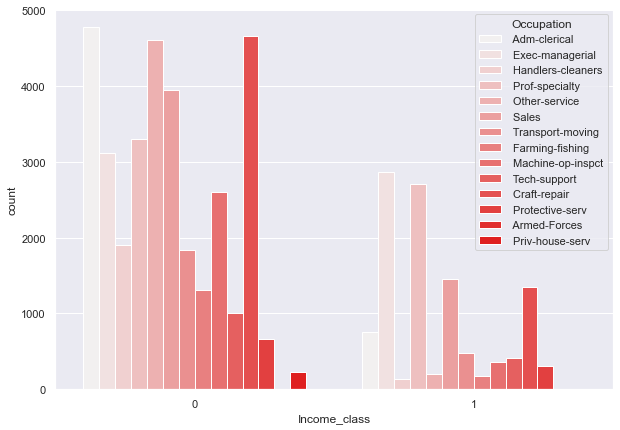

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(x='Income_class', hue='Occupation', data=df, color='red')

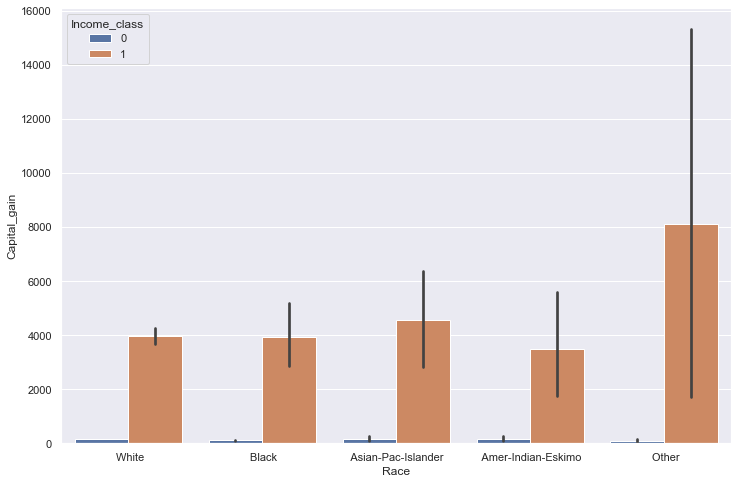

In [41]:
plt.figure(figsize=(12,8))
sns.barplot(x='Race', y='Capital_gain', data=df, hue='Income_class');

__observation:__  
Asian-Pac-Islander have gain more capital followed by Black, white and than India

<AxesSubplot:xlabel='Workclass', ylabel='count'>

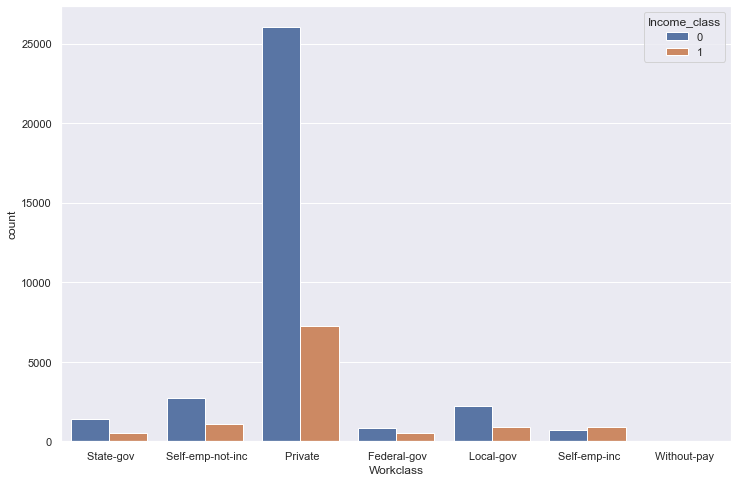

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Workclass', hue='Income_class')

__observation:__  
There are more Private employees getting income more than 50k followed by self employed


<AxesSubplot:xlabel='Marital_status', ylabel='count'>

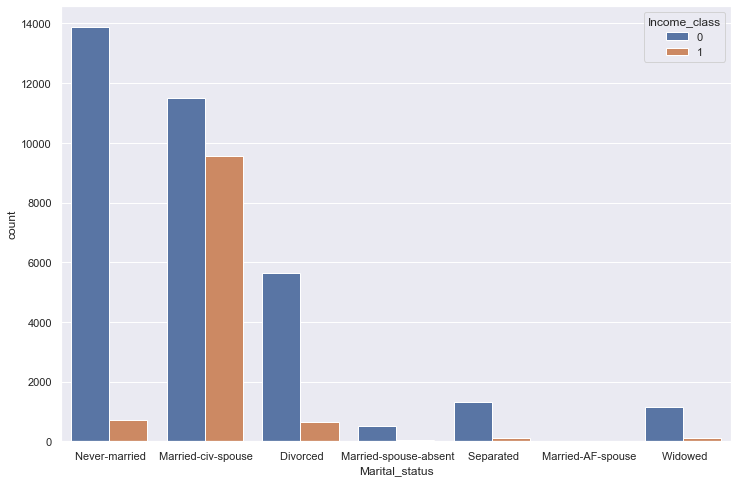

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Marital_status', hue='Income_class')

__observation:__  
* More number of Married person have income above 50k than others
* Maximum Never maried person have income less than 50 k

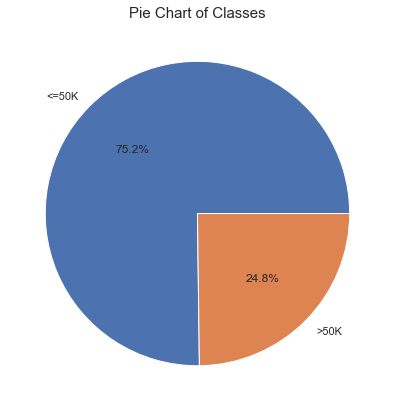

In [44]:
percentage=df.Income_class.value_counts(normalize=True)*100
classes_labels=['<=50K','>50K']
plt.figure(figsize=(7,7))
plt.pie(percentage,labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

__observation:__  
* More than 75% of people have Income less than or equal to 50K

### Outliers

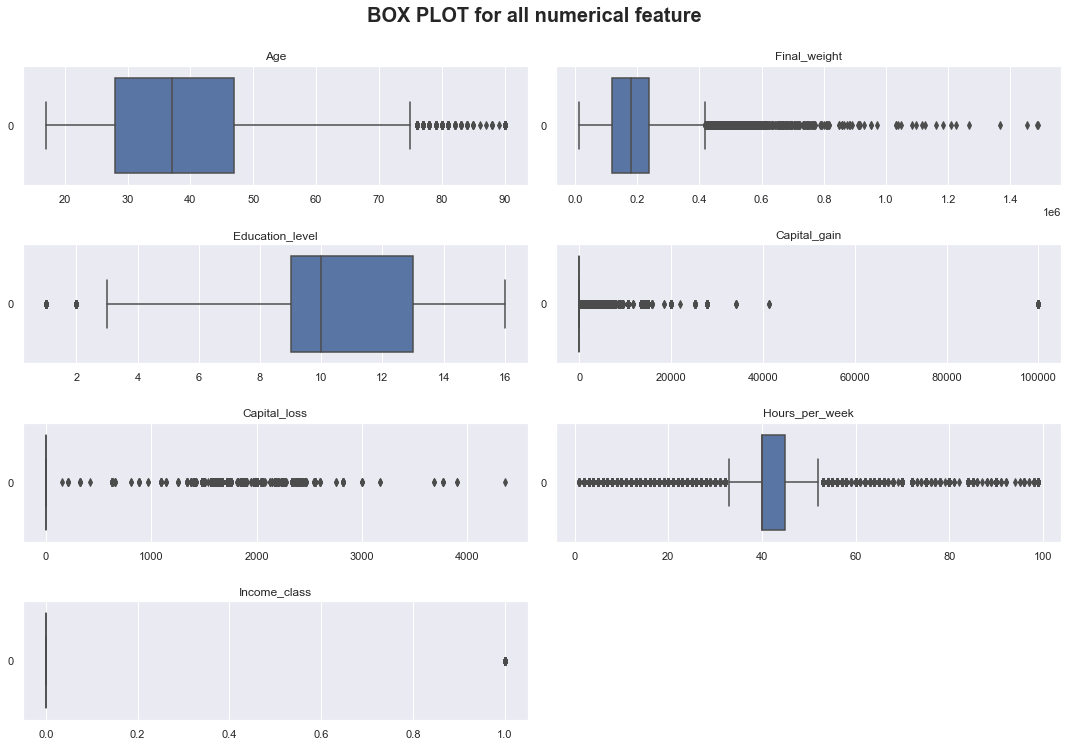

In [45]:
plt.figure(figsize=(15, 20))
plt.suptitle('BOX PLOT for all numerical feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(num_feat)):
    plt.subplot(8, 2, i+1)
    sns.boxplot(data=df[num_feat[i]],orient='h')
    plt.title(label = num_feat[i])
    plt.tight_layout()

### Variance inflation Factor (for Multicollinearity)

In [46]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(df[num_feat],i) for i in range(df[num_feat].shape[1])]
vif["Features"] =num_feat

#let's check the values
vif

,vif,Features
0,7.828135,Age
1,3.727142,Final_weight
2,11.484371,Education_level
3,1.080586,Capital_gain
4,1.078655,Capital_loss
5,10.562250,Hours_per_week
6,1.558589,Income_class


In [47]:
df_new =pd.DataFrame()
df_new = df

# 6. PreProcessing

### Label encoding on the categorical features


In [48]:
from sklearn.preprocessing import LabelEncoder
for column in df_new.columns:
    if df_new[column].dtypes == 'object':
        encoder = LabelEncoder()
        df_new[column] = encoder.fit_transform(df_new[column])

In [49]:
df_new

,Age,Workclass,Final_weight,Education,Education_level,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_class
0,39,5,77516.0,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,38,0
1,50,4,83311.0,9,13.0,2,3,0,4,1,0.0,0.0,13.0,38,0
2,38,2,215646.0,11,9.0,0,5,1,4,1,0.0,0.0,40.0,38,0
3,53,2,234721.0,1,7.0,2,5,0,2,1,0.0,0.0,40.0,38,0
4,28,2,338409.0,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45189,33,2,245211.0,9,13.0,4,9,3,4,1,0.0,0.0,40.0,38,0
45190,39,2,215419.0,9,13.0,0,9,1,4,0,0.0,0.0,36.0,38,0
45191,38,2,374983.0,9,13.0,2,9,0,4,1,0.0,0.0,50.0,38,0
45192,44,2,83891.0,9,13.0,0,0,3,1,1,5455.0,0.0,40.0,38,0


#### Input and Output Features

In [50]:
X = df_new.drop(['Income_class'], axis=1)
y = df_new.Income_class

In [51]:
X.head()

,Age,Workclass,Final_weight,Education,Education_level,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,39,5,77516.0,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,38
1,50,4,83311.0,9,13.0,2,3,0,4,1,0.0,0.0,13.0,38
2,38,2,215646.0,11,9.0,0,5,1,4,1,0.0,0.0,40.0,38
3,53,2,234721.0,1,7.0,2,5,0,2,1,0.0,0.0,40.0,38
4,28,2,338409.0,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4


In [52]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45189    0
45190    0
45191    0
45192    0
45193    1
Name: Income_class, Length: 45194, dtype: int64

### Splitting The Training and Testing Data 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [54]:
X_train.head()

,Age,Workclass,Final_weight,Education,Education_level,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
42154,25,2,409815.0,8,11.0,4,3,1,2,0,0.0,0.0,40.0,38
3141,22,2,341368.0,15,10.0,4,7,1,4,1,0.0,0.0,50.0,38
26769,35,2,206951.0,12,14.0,2,11,0,4,1,0.0,0.0,40.0,38
25904,65,2,180280.0,15,10.0,2,3,5,4,0,0.0,0.0,40.0,38
14084,28,4,155621.0,15,10.0,4,2,3,4,1,0.0,0.0,50.0,3


In [55]:
X_test.head()

,Age,Workclass,Final_weight,Education,Education_level,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
3697,21,2,211385.0,7,12.0,4,7,1,2,1,0.0,0.0,35.0,22
32885,18,2,65098.0,11,9.0,4,7,3,4,1,0.0,0.0,15.0,38
35152,42,2,198282.0,11,9.0,2,7,0,4,1,0.0,0.0,40.0,38
38536,26,2,40255.0,8,11.0,4,4,3,4,1,0.0,0.0,40.0,38
442,27,2,161155.0,0,6.0,4,7,1,4,1,0.0,0.0,40.0,38


In [56]:
y_train

42154    0
3141     0
26769    1
25904    0
14084    0
        ..
40059    1
28017    0
29199    0
40061    1
17673    0
Name: Income_class, Length: 30279, dtype: int64

In [57]:
y_test

3697     0
32885    0
35152    0
38536    0
442      0
        ..
1515     0
43369    0
22982    0
34246    0
19191    0
Name: Income_class, Length: 14915, dtype: int64

In [58]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((30279, 14), (30279,), (14915, 14), (14915,))

### Feature Scaling

In [59]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [60]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [61]:
X_train_scaled

array([[-1.02974404, -0.21220625,  2.10668326, ..., -0.21614688,
        -0.07748041,  0.26410036],
       [-1.25568877, -0.21220625,  1.45283754, ..., -0.21614688,
         0.75630756,  0.26410036],
       [-0.27659494, -0.21220625,  0.16880785, ..., -0.21614688,
        -0.07748041,  0.26410036],
       ...,
       [-1.18037386, -0.21220625,  0.95040028, ..., -0.21614688,
        -0.91126837,  0.26410036],
       [ 0.09997962, -0.21220625, -1.27730054, ..., -0.21614688,
        -0.07748041,  0.26410036],
       [ 1.75690765,  2.9297952 , -1.42954007, ..., -0.21614688,
        -0.07748041,  0.26410036]])

In [62]:
X_test_scaled

array([[-1.33100369, -0.21220625,  0.21116401, ..., -0.21614688,
        -0.49437439, -2.35916444],
       [-1.55694842, -0.21220625, -1.18625486, ..., -0.21614688,
        -2.16195031,  0.26410036],
       [ 0.25060944, -0.21220625,  0.0859965 , ..., -0.21614688,
        -0.07748041,  0.26410036],
       ...,
       [-0.42722476, -0.21220625,  0.46542514, ..., -0.21614688,
        -0.07748041, -1.86730229],
       [ 2.88663131,  1.88246138, -0.04999409, ..., -0.21614688,
        -1.74505633,  0.26410036],
       [ 0.85312872, -0.21220625,  0.01416107, ..., -0.21614688,
        -0.07748041, -1.86730229]])

#### VIF after Scaling

In [63]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_train_scaled,i) for i in range(X_train_scaled.shape[1])]
vif["Features"] = X_train.columns
#let's check the values
vif

,vif,Features
0,1.154198,Age
1,1.016884,Workclass
2,1.014283,Final_weight
3,1.152076,Education
4,1.213329,Education_level
5,1.119790,Marital_status
6,1.015798,Occupation
7,1.672424,Relationship
8,1.035846,Race
9,1.563899,Sex


# 7. Model Training

## Logistic regression Model

In [64]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

#### Saving the model in a pickle file

In [65]:
import pickle
# Writing different model files to file
with open( 'LogisticmodelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)

In [66]:
# Prediction
y_pred = log_reg.predict(X_test_scaled)

#### Performance Metrics

In [67]:
# Accuracy score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8215890043580288

### Confusion matrix and Classification Report

In [68]:
# Import Logistic Regression to Train from SKlearn
loreg = LogisticRegression(max_iter=200)
loreg.fit(X_train_scaled,y_train)
loreg_pred = loreg.predict(X_test_scaled)
score = accuracy_score(y_test,loreg_pred)
cr = classification_report(y_test,loreg_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.8216
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     11314
           1       0.70      0.46      0.56      3601

    accuracy                           0.82     14915
   macro avg       0.77      0.70      0.72     14915
weighted avg       0.81      0.82      0.81     14915



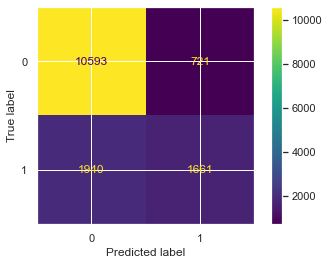

In [73]:
loreg_cm = ConfusionMatrixDisplay.from_estimator(loreg, X_test_scaled, y_test)

#### Area Under Curve

In [74]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.698767202086785

#### ROC

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

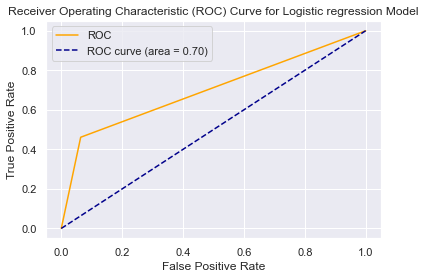

In [76]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic regression Model')
plt.legend()
plt.show()

## SVC Model

In [77]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_scaled,y_train)

SVC()

##### Saving the SVC model

In [78]:
import pickle
# Writing different model files to file
with open( 'SVCmodelForPrediction.sav', 'wb') as f:
    pickle.dump(svc_model,f)

##### Prediction

In [79]:
y_pred_svc = svc_model.predict(X_test_scaled)

##### Accuracy Score

In [80]:
# Accuracy score
accuracy_svc = accuracy_score(y_test,y_pred_svc)
accuracy_svc

0.8451894066376131

### Consusion Matrix and Classification report

In [81]:
score1 = accuracy_score(y_test,y_pred_svc)
cr = classification_report(y_test,y_pred_svc)

print("Support Vector Classifier")
print ("Accuracy Score value: {:.4f}".format(score1))
print (cr)

Support Vector Classifier
Accuracy Score value: 0.8452
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11314
           1       0.73      0.56      0.64      3601

    accuracy                           0.85     14915
   macro avg       0.80      0.75      0.77     14915
weighted avg       0.84      0.85      0.84     14915



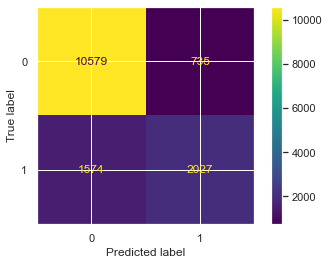

In [82]:
svc_cm = ConfusionMatrixDisplay.from_estimator(svc_model, X_test_scaled, y_test)

##### Area Under Curve

In [83]:
auc_svc = roc_auc_score(y_test, y_pred_svc)
auc_svc 

0.7489677164784966

#### ROC

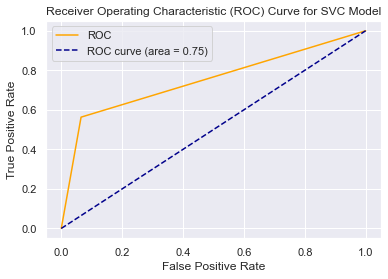

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_svc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVC Model')
plt.legend()
plt.show()

## Decision Tree Classifier Model

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [86]:
# Prediction
y_pred_dt = dt_model.predict(X_test_scaled)

#### Saving the model

In [87]:
import pickle
# Writing different model files to file
with open( 'Decision_Tree_modelForPrediction.sav', 'wb') as f:
    pickle.dump(dt_model,f)

##### Accuracy_Score

In [88]:
accuracy_dt = accuracy_score(y_test,y_pred_dt)
accuracy_dt

0.8067717063359034

### Consusion Matrix and Classification report

In [89]:
score2 = accuracy_score(y_test,y_pred_dt)
cr = classification_report(y_test,y_pred_dt)

print("Decision Tree Classifier")
print ("Accuracy Score value: {:.4f}".format(score2))
print (cr)

Decision Tree Classifier
Accuracy Score value: 0.8068
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     11314
           1       0.59      0.63      0.61      3601

    accuracy                           0.81     14915
   macro avg       0.74      0.75      0.74     14915
weighted avg       0.81      0.81      0.81     14915



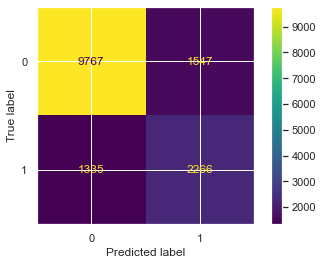

In [90]:
dt_cm = ConfusionMatrixDisplay.from_estimator(dt_model, X_test_scaled, y_test)

#### Are Under Curve and ROC

In [91]:
auc_dt = roc_auc_score(y_test, y_pred_dt)
auc_dt 

0.7462681982402606

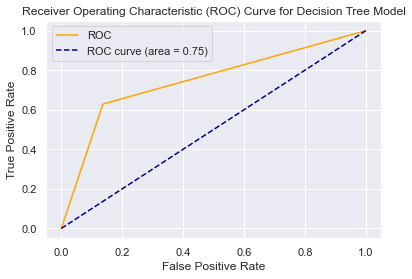

In [102]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_dt)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Model')
plt.legend()
plt.show()

## Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier()

In [94]:
RF_model.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [97]:
y_pred_rf = RF_model.predict(X_test_scaled)

##### Saving the model

In [96]:
import pickle
# Writing different model files to file
with open( 'Random_Forest_modelForPrediction.sav', 'wb') as f:
    pickle.dump(RF_model,f)

#### Accuracy Score

In [98]:
accuracy_rf = accuracy_score(y_test,y_pred_rf)
accuracy_rf

0.8523633925578277

### Confusion Matrix and Classification Report

In [99]:
score = accuracy_score(y_test,y_pred_rf)
cr = classification_report(y_test,y_pred_rf)

print("Random Forest Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest Classifier
Accuracy Score value: 0.8524
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     11314
           1       0.72      0.64      0.68      3601

    accuracy                           0.85     14915
   macro avg       0.80      0.78      0.79     14915
weighted avg       0.85      0.85      0.85     14915



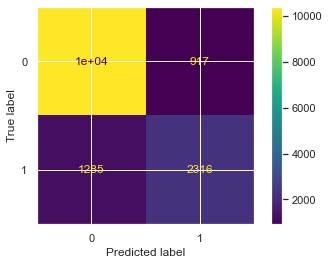

In [140]:
rf_cm = ConfusionMatrixDisplay.from_estimator(RF_model, X_test_scaled, y_test)

##### Area under Curve and ROC

In [100]:
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_rf 

0.7810523263699706

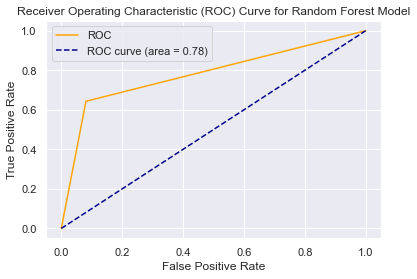

In [101]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Model')
plt.legend()
plt.show()

## Bagging Classifier

In [105]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

bagging_model_dt = BaggingClassifier(base_estimator =DecisionTreeClassifier(),n_estimators = 30,random_state = 0).fit(X_train_scaled,y_train)

In [107]:
y_pred_bagging = bagging_model_dt.predict(X_test_scaled)

##### Saving model

In [108]:
import pickle
# Writing different model files to file
with open( 'Bagging_Classifier_modelForPrediction.sav', 'wb') as f:
    pickle.dump(bagging_model_dt,f)

##### Accuracy score

In [109]:
accuracy_bagging = accuracy_score(y_test,y_pred_bagging)
accuracy_bagging

0.8486758297016427

#### Classification report, area under curve and ROC

In [110]:
score = accuracy_score(y_test,y_pred_bagging)
cr = classification_report(y_test,y_pred_bagging)

print("Bagging Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Bagging Classifier
Accuracy Score value: 0.8487
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     11314
           1       0.71      0.63      0.67      3601

    accuracy                           0.85     14915
   macro avg       0.80      0.77      0.79     14915
weighted avg       0.84      0.85      0.85     14915



In [141]:
bag_cm = ConfusionMatrixDisplay.from_estimator(bagging_model, X_test_scaled, y_test)

NameError: name 'bagging_model' is not defined

In [111]:
auc_bagging = roc_auc_score(y_test, y_pred_bagging)
auc_bagging 

0.774456788931364

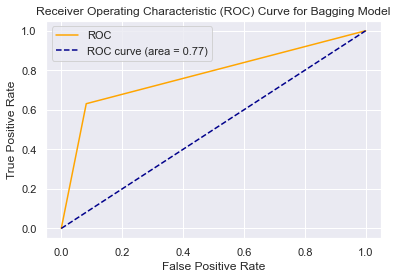

In [112]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bagging)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_bagging)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Bagging Model')
plt.legend()
plt.show()

## Extra Tree Classifier

In [115]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

In [116]:
etc_model = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc_model.fit(X_train_scaled, y_train)
y_pred_etc = etc_model.predict(X_test_scaled)

In [118]:
# Saving the model
import pickle
# Writing different model files to file
with open( 'ExtraTree_Classifier_modelForPrediction.sav', 'wb') as f:
    pickle.dump(etc_model,f)

##### Accuracy Score

In [119]:
accuracy_etc = accuracy_score(y_test,y_pred_etc)
accuracy_etc

0.8435132417029836

#### Classification report, area under curve and ROC

In [120]:
score = accuracy_score(y_test,y_pred_etc)
cr = classification_report(y_test,y_pred_etc)

print("Extra Tree Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Extra Tree Classifier
Accuracy Score value: 0.8435
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     11314
           1       0.69      0.63      0.66      3601

    accuracy                           0.84     14915
   macro avg       0.79      0.77      0.78     14915
weighted avg       0.84      0.84      0.84     14915



In [ ]:
etc_cm = ConfusionMatrixDisplay.from_estimator(etc_model, X_test_scaled, y_test)

In [122]:
auc_etc = roc_auc_score(y_test, y_pred_etc)
auc_etc

0.7709592679385066

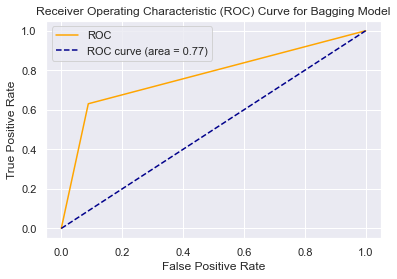

In [123]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_etc)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_etc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Bagging Model')
plt.legend()
plt.show()

## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
log_1 = LogisticRegression()
svc_2 = SVC()
dt_3 = DecisionTreeClassifier()
rf_4 = RandomForestClassifier(n_estimators=50, random_state=0)
et_5 =ExtraTreesClassifier(n_estimators=50, random_state=0)
bag_6 =BaggingClassifier(base_estimator =DecisionTreeClassifier(),n_estimators = 30,random_state = 0)

In [ ]:
voting_model = VotingClassifier(estimators=[('lr',log_1 ),('svc' , svc_2),('dt',dt_3), ('rf',rf_4 ),('etc',et_5),('bag',bag_6)], voting='hard')

In [ ]:
voting_model.fit(X_train_scaled,y_train)

In [ ]:
y_pred_voting = voting_model.predict(X_test_scaled)

###  Hard Voting Score

In [ ]:
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred_voting)
print("Hard Voting Score % d" % score)

## Report

In [133]:
a = [accuracy,accuracy_svc,accuracy_dt,accuracy_rf,accuracy_bagging,accuracy_etc]
b = [auc,auc_svc,auc_dt,auc_rf,auc_bagging,auc_etc]
c = ["Logistic Regression Model","Support Vector classifier Model","Decision treee Classifier Model","Random Tree classifier Model","Bagging Classifier Model","Extra tree Classifier"]
for i in range(0,len(c)):
            print("The accuracy of the ",c[i]," is: ",a[i], " and the Area Under Curve is : ",b[i])

The accuracy of the  Logistic Regression Model  is:  0.8215890043580288  and the Area Under Curve is :  0.698767202086785
The accuracy of the  Support Vector classifier Model  is:  0.8451894066376131  and the Area Under Curve is :  0.7489677164784966
The accuracy of the  Decision treee Classifier Model  is:  0.8067717063359034  and the Area Under Curve is :  0.7462681982402606
The accuracy of the  Random Tree classifier Model  is:  0.8523633925578277  and the Area Under Curve is :  0.7810523263699706
The accuracy of the  Bagging Classifier Model  is:  0.8486758297016427  and the Area Under Curve is :  0.774456788931364
The accuracy of the  Extra tree Classifier  is:  0.8435132417029836  and the Area Under Curve is :  0.7709592679385066


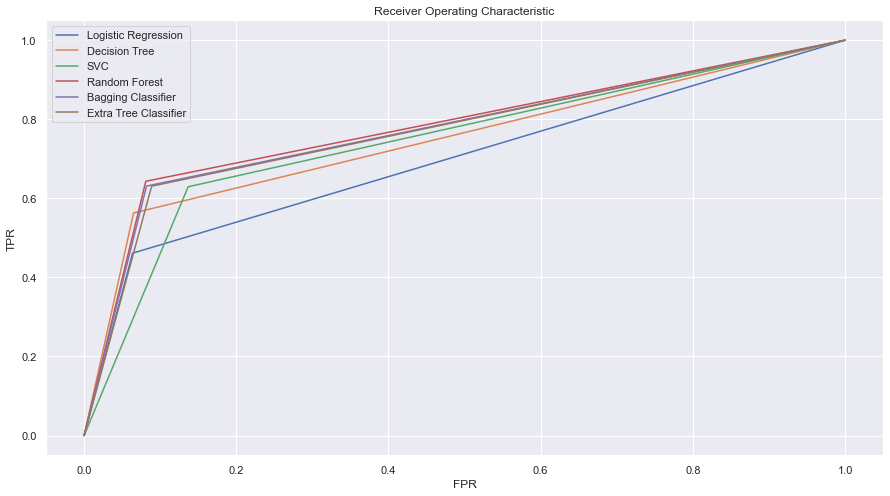

In [134]:
plt.figure(figsize=(15,8))
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_svc)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_dt)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_rf)
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred_bagging)
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_pred_etc)

plt.plot(fpr1, tpr1, label= "Logistic Regression")
plt.plot(fpr2, tpr2, label= "Decision Tree")
plt.plot(fpr3, tpr3, label= "SVC")
plt.plot(fpr4,tpr4,label="Random Forest")
plt.plot(fpr5,tpr5,label="Bagging Classifier")
plt.plot(fpr6,tpr6,label="Extra Tree Classifier")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

__Random Forest Classifier model is the best in this case as It has the Highest Accuracy and also has Highest Area under Curve So we choose this model and apply Hyper Parameter tuning to this model to further increrase it's accuracy__  


# 8. HyperParameter Tuning

Grid Search CV on Random Forest model

In [137]:
params = {
    "n_estimators": [90,100,115,130],
    "criterion" : ['gini' , 'entropy'],
    "max_depth" : range(2,20,1),
    "min_samples_leaf" : range(1,10,1),
    "min_samples_split" : range(2,10,1),
    "max_features" : ['auto','log2']
}

In [138]:
grid_rf= GridSearchCV(RF_model,param_grid=params, cv=3,verbose=2 ,n_jobs=-1)
grid_rf.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 20736 candidates, totalling 62208 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=2)

In [139]:
grid_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 19,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 100}

#### Creating a model with best parameters

In [142]:
rf_model_hyper = RandomForestClassifier(criterion= 'entropy',max_depth= 19,max_features= 'log2',min_samples_leaf= 1,min_samples_split= 8,n_estimators= 100)
rf_model_hyper.fit(X_train_scaled,y_train)

RandomForestClassifier(criterion='entropy', max_depth=19, max_features='log2',
                       min_samples_split=8)

In [143]:
# new predictions 
y_pred_rf_hyper=rf_model_hyper.predict(X_test_scaled)
y_pred_rf_hyper

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
print("Accuracy Score:",accuracy_score(y_pred_rf_hyper,y_test))
print("Classification Report:\n",classification_report(y_pred_rf_hyper,y_test))

Accuracy Score: 0.8604760308414348
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91     11899
           1       0.63      0.75      0.69      3016

    accuracy                           0.86     14915
   macro avg       0.78      0.82      0.80     14915
weighted avg       0.87      0.86      0.86     14915



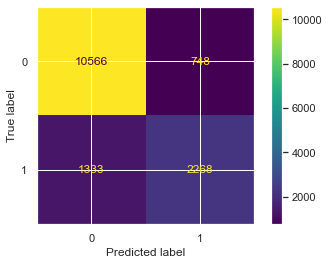

In [145]:
svc_cm_hyper = ConfusionMatrixDisplay.from_estimator(rf_model_hyper, X_test_scaled, y_test)

##### Area under curve and Roc

In [146]:
auc_rf_hyper = roc_auc_score(y_test, y_pred_rf_hyper)
auc_rf_hyper

0.7818561339859192

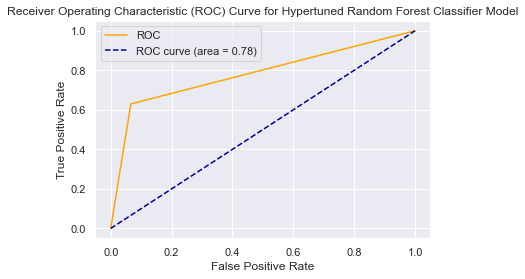

In [147]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_hyper)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_rf_hyper)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Hypertuned Random Forest Classifier Model')
plt.legend()
plt.show()

Using GridSearchCV we are able to hypertune the SVC model and Increase Accuracy and Area under curve.


##### Saving the final model

In [148]:
import pickle
# Writing different model files to file
with open( 'Hypertuned_rf_modelForPrediction.sav', 'wb') as f:
    pickle.dump(rf_model_hyper,f)

# Thank You  
  
--Performed By : __Ankit Dubey__